# Обработка изображений и компьютерное зрение

#### Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio
import scipy.signal

from skimage.color import rgb2hsv, hsv2rgb

##### Загрузим картинку

In [99]:
img = imageio.imread('wild1_700.jpg')
img = img.astype(np.float32) / 255.
print(img.shape)

(621, 1100, 3)


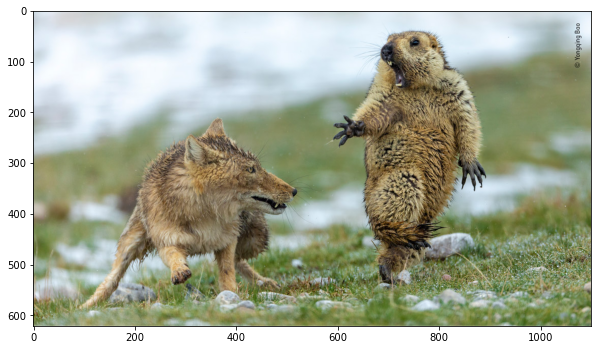

In [100]:
plt.figure(figsize=(10, 10))
plt.imshow(img)

##### Сделаем картинку более насыщенной

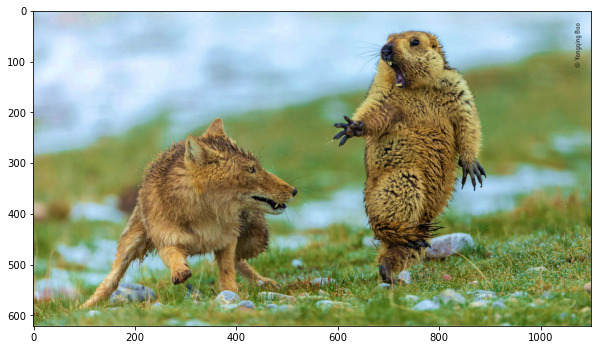

In [101]:
img_hsv = np.copy(rgb2hsv(img))
img_hsv[:, :, 1] **= 0.6
img_new = hsv2rgb(img_hsv)

plt.figure(figsize=(10, 10))
plt.imshow(img_new)

##### Свёртка изображения с ядром Собеля

In [153]:
wh = np.array([[-1, -2, -1],
               [ 0,  0,  0],
               [ 1,  2,  1]])
wv = np.array([[-1,  0,  1],
               [-2,  0,  2],
               [-1,  0,  1]])

In [175]:
out_img = []
for c in range(3):
    imgh = scipy.signal.correlate2d(img_new[:,:,c], wh, mode='valid')
    imgv = scipy.signal.correlate2d(img_new[:,:,c], wv, mode='valid')
    out_img.append((imgh**2 + imgv**2)**0.5)
out_img = np.stack(out_img, axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


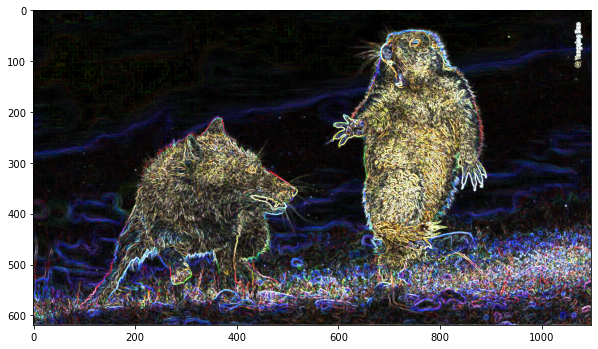

In [177]:
plt.figure(figsize=(10, 10))
plt.imshow(out_img)